# A Very Simplified MultiCopter Design with Python
Objectives : 
* Get familiar with Colab Notebooks
* Learn simple Python
* Prepare building blocks for multicopter optmization

<a href="https://colab.research.google.com/github/mrtbrnz/Intro2UAS/blob/master/notebooks/00_simple_MultiCopter_design.ipynb">
<img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

## Introduction to NumPy
*This notebook contains several excerpts from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

You can import NumPy and double-check the version:

In [ ]:
import numpy
numpy.__version__

'1.11.1'

By convention, you'll find that most people in the SciPy/PyData world will import NumPy using ``np`` as an alias:

In [1]:
import numpy as np

## Reminder about Built In Documentation

For example, to display all the contents of the numpy namespace, you can type this:

```ipython
In [3]: np.<TAB>
```

And to display NumPy's built-in documentation, you can use this:

```ipython
In [4]: np?
```

More detailed documentation, along with tutorials and other resources, can be found at http://www.numpy.org.

In [ ]:
# Try here !


Users of Python are often drawn-in by its ease of use, one piece of which is dynamic typing.
While a statically-typed language like C or Java requires each variable to be explicitly declared, a dynamically-typed language like Python skips this specification. For example, in C you might specify a particular operation as follows:

```C
/* C code */
int result = 0;
for(int i=0; i<100; i++){
    result += i;
}
```

While in Python the equivalent operation could be written this way:

```python
# Python code
result = 0
for i in range(100):
    result += i
```

Notice the main difference: in C, the data types of each variable are explicitly declared, while in Python the types are dynamically inferred. This means, for example, that we can assign any kind of data to any variable:

```python
# Python code
x = 4
x = "four"
```

## A Python List Is More Than Just a List

```ipython
L = list(range(10))
L
```

```ipython
L2 = [str(c) for c in L]
L2
```

```ipython
L3 = [True, "2", 3.0, 4]
[type(item) for item in L3]
```


In [ ]:
#Try here

## Create arrays

```ipython
np.arange(5)
```
```ipython
np.linspace(1,10,10)
```
```ipython
np.
```
```ipython
np.
```

In [95]:
# Try here:
np.linspace(1,10,10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

## Lets plot something

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style

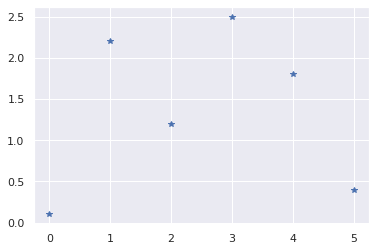

In [23]:
x = [0, 1, 2, 3, 4, 5]
y = [0.1, 2.2, 1.2, 2.5, 1.8, 0.4]
plt.plot(x,y,'*')

In [15]:
# data = np.random.randint(1,5,6)
data = np.random.rand(5)

In [16]:
data

array([0.110486  , 0.85951522, 0.09695411, 0.7438793 , 0.44266194])

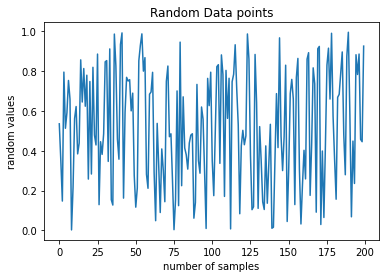

In [14]:
plt.plot(data)
plt.title('Random Data points')
plt.xlabel('number of samples')
plt.ylabel('random values');

In [37]:
seaborn.reset_orig()

In [38]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

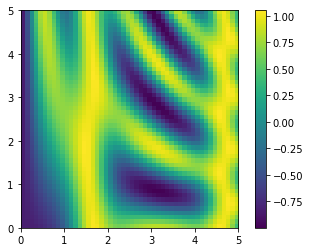

In [39]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5], cmap='viridis')
plt.colorbar();

## Now, let's move onto a real example !
(Example from Antoine Drouin)

International Standard Atmosphere Model
see:
 http://en.wikipedia.org/wiki/International_Standard_Atmosphere


In [7]:
'''
International Standard Atmosphere Model
see: http://en.wikipedia.org/wiki/International_Standard_Atmosphere
'''
_name, _h0, _z0, _a, _T0, _p0 = np.arange(6)
#      name         h(m)    z(km)    a(K/m)    T0(K)    p0(Pa)
param = \
[['Troposphere',       0,   0.0,    -6.5e-3,   288.15,   101325],
 ['Tropopause',    11000,  11.019,   0.,       216.65,    22632],
 ['Stratosphere',  20000,  20.063,   1.0e-3,   216.65,   5474.9],
 ['Stratosphere',  32000,  32.162,   2.8e-3,   228.65,   868.02],
 ['Stratopause',   47000,  47.350,   0.0e-3,   270.65,   110.91],
 ['Mesosphere',    51000,  51.413,  -2.8e-3,   270.65,   66.939],
 ['Mesosphere',    71000,  71.802,  -2.0e-3,   214.65,   3.9564],
 ['Mesopause',     84852,  86.000,   0.,       186.87,   0.3734]]

In [8]:
import math

def mach_of_va(va, T, k=1.4, Rs=287.05): return va/np.sqrt(k*Rs*T)

def get_rho(h):
    """
    Get air density at the given altitude (in m)
    Warning, the two parts of that function do not
    join well!
    """
    if h<= 11000:
        return 1.225 * math.pow((1-6.5e-3*h/288.15), 4.2557)
    else:
        return 0.36 * np.exp(-1.17e-4*(h-11000))

def isa(h):
    layer = 0
    while param[layer][_h0] < h: layer+=1
    name, h0, z0, a, T0, p0 = param[layer-1]
    dh = h - h0
    T = T0 + a*dh
    g=9.81; R=287.0
    if a != 0.:
        p = p0*math.pow(T/T0, -g/a/R)
    else:
        p = p0*math.exp(-g/R/T0*dh)
    rho = p/R/T
    return p, rho, T

In [9]:
def decorate(ax, title=None, xlab=None, ylab=None, legend=None):
    ax.xaxis.grid(color='k', linestyle='-', linewidth=0.2)
    ax.yaxis.grid(color='k', linestyle='-', linewidth=0.2)
    if xlab:
        ax.xaxis.set_label_text(xlab)
    if ylab:
        ax.yaxis.set_label_text(ylab)
    if title:
        ax.set_title(title, {'color'    : 'k', 'fontsize'   : 20 })
    if legend != None:
        ax.legend(legend, loc='best')

def plot_atmosphere(h0=1, h1=84000):
    h = np.linspace(h0, h1, 1000)
    v = np.array(list(map(isa, h)))
    v1 = np.array(list(map(get_rho, h)))
    # print(v1)
    #pdb.set_trace()
    
    ax = plt.subplot(1, 3, 1)
    plt.plot(v[:,2], h)
    decorate(ax, 'Temperature', 'K', 'm')
    ax = plt.subplot(1, 3, 2)
    plt.plot(v[:,1], h)
    plt.plot(v1, h, 'r')
    decorate(ax, 'Density', 'Kg/m3', 'm')
    ax = plt.subplot(1, 3, 3)
    plt.plot(v[:,0], h)
    decorate(ax, 'Pressure', 'Pa', 'm')
    plt.show()

ISA at 1m : 101312.98111336395 Pa 1.225107985548939 kg/m3 288.14349999999996 K


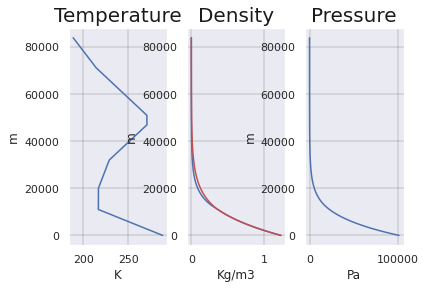

In [24]:
h = 1
print(f"ISA at {h}m : {isa(h)[0]} Pa {isa(h)[1]} kg/m3 {isa(h)[2]} K")

plot_atmosphere(h0=1, h1=84000)

In [87]:
# Try to get ISA rho at an altitude:


# Propeller Force

We can simplify the thrust as the mass flow rate difference of input and output of the propeller disk 

$F = \dot{m}(V_e-V_0)$

Mass flow rate is : \
$\dot{m}=\rho A V_e$ 

Propeller disc area is : \
$A = \frac{\pi d^2}{4}$

Total Thrust can be written as \
$F =\rho\frac{\pi d^2}{4} (V_e^2- V_eV_0)$  

Where we can approximate the exit veocity as \
$V_e = \eta_{prop}V_{pitch}$

A very simplified way of defining the pitch speed of the proppeler

$V_{pitch} = RPM_{prop} Prop_{pitch}$  with units in $[inches/minutes]$

So convert to m/s by multipliying with 60*0.0254...

In [ ]:
prop_pitch = 4 #inches
prop_diameter = 5 #inches
cd_arm   = 1.5 # drag coefficient of the arms (source: Hoerner)
cd_frame = 1.2 # Realistic for a bluff body
area_arm = 0.01*prop_diameter*0.0254/2 *  #m^2, area of the arms below the propeller, constant thickness of 1cm          
angle_tilted_body = 0/180*np.pi #rad, how much is the nose of the frame tilted up in the design
frame_width = 0.05 #m
frame_length = 0.17 #m
area_frame_frontal = frame_width**2 # m^2 area of the main body of the frame as viewed from the front 
area_frame_dorsal  = frame_width*frame_length # m^2 area of the main body of the frame as viewed from the top 

In [ ]:
# Write a function that estimates the force of a propeller
# Use only RPM as an input


# Now write a function that finds the hover thrust
* Input only RPM again


## If we assume zero vertical movement, any excessive RPM more than the hover will result in forward movement as the multicopter will require to pitch down.

* Let's calculate the drag force and resultant forward velocity

# Drag Force



In [ ]:
def calc_drag(RPM):
    # Drag of the fuselage
    area_frame_horizontal = abs(sin(angle-angle_tilted_body)*area_frame_dorsal) + abs(cos(angle-angle_tilted_body)*area_frame_frontal) #m^2

    # Drag of the motor arms embedded inside propeller slipstream

    return drag

# Now Create a MultiCopter Class

*   Initiates with default values and coeffs
*   Estimates total mass
*   Calculates total drag at a given flight speed
*   Calculates total propulsion consumption at that flight speed



In [87]:
class MultiCopter():
    def __init__(self, num_motor=4, prop_D=5):
        self.num_motor = num_motor # Motor number 
        self.prop_D = prop_D # Propeller diameter [in inches]

        self.mass = 0. # Initial mass
        ...

    def estimate_mass(self):
        '''Updates the total mass estimation'''
        self.mass = 0. #
        ...

    def calc_drag(self,V):
        # Drag of the fuselage

        # Drag of the motor arms embedded inside propeller slipstream
        return drag

    def calc_power(self,V):
        ...
        return power
    


<a href="https://colab.research.google.com/github/mrtbrnz/Intro2UAS/blob/master/notebooks/00_simple_MultiCopter_design.ipynb">
<img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
